<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn import datasets
import plotly
import plotly.express as px
import plotly.graph_objects as go
import statistics
import pickle
from os import path

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas.

In [2]:
hh_data = pd.read_csv('D:\Data Science\data\hh_database.csv', sep = ';')
hh_df = hh_data.copy()
print(hh_df.shape)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_8380\370138297.py:1: SyntaxWarning: invalid escape sequence '\D'
  hh_data = pd.read_csv('D:\Data Science\data\hh_database.csv', sep = ';')


(44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
print(hh_df.head(2))

                                 Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0        

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
print(hh_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
print('Количество непустых значений: ', hh_df.isnull().sum().sum ())

Количество непустых значений:  171


5. Выведите основную статистическую информацию о столбцах.


In [6]:
print(hh_df.describe())

                                         Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
cou

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(lambda x: (' '.join(x.split()[:2])).lower())
hh_df['Образование'] = hh_df['Образование'].apply(lambda x: (' '.join(x.split()[:1])) if x == 'высшее образование' or x =='среднее образование' in x else x)
hh_df = hh_df.drop('Образование и ВУЗ', axis = 1)
print(hh_df['Образование'].value_counts())

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: x.split(',')[0].strip())
hh_df['Пол'] = hh_df['Пол, возраст'].apply(lambda x: 'М' if 'Мужчина' in x else 'Ж')
print(hh_df['Пол'])

hh_df['Возраст'] = hh_df['Пол, возраст'].apply(lambda x: int(''.join(filter(str.isdigit, x.split(',')[1]))))
print(hh_df['Возраст'].mean())

hh_df.drop('Пол, возраст', axis=1, inplace=True)

0        М
1        М
2        Ж
3        М
4        Ж
        ..
44739    М
44740    М
44741    Ж
44742    М
44743    М
Name: Пол, Length: 44744, dtype: object
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
def get_experience(arg):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
    if isinstance(arg, str):
        cleaned_exp = arg.replace(',', '').replace('.', '').lower()
        args_splited = cleaned_exp.split(' ')[:6]
        month = 0
        year = 0
        if (arg is np.nan) or (arg == 'Не указано'):
            return None
        for index, item in enumerate(args_splited):
            if item in year_key_words:
                year = int(args_splited[index-1])
            if item in month_key_words:
                month = int(args_splited[index-1])
        return int(year*12 + month)
    else:
        return None
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)

print(hh_df['Опыт работы (месяц)'])
print(hh_df['Опыт работы (месяц)'].median(skipna=True))


0        202.0
1        233.0
2        123.0
3        225.0
4         67.0
         ...  
44739     91.0
44740     84.0
44741    257.0
44742     46.0
44743    190.0
Name: Опыт работы (месяц), Length: 44744, dtype: float64
100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
def get_city(city):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 
                  'Пермь', 'Воронеж', 'Волгоград' ]
    cleaned_city = city.split(' , ')[0]
    if (cleaned_city == 'Москва') or (cleaned_city == 'Санкт-Петербург'):
        return cleaned_city
    elif cleaned_city in million_cities:
        return 'Город-миллионник'
    else:
        return 'другие'
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city)

In [11]:
def get_moving_out(move):
    if ('не готов к переезду' in move) or ('не готова к переезду' in move):
        return False
    else:
        return True
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_moving_out)

In [12]:
def get_business_trip(trip):
    if ('не готов к командировкам' in trip) or ('не готова к командировкам' in trip):
        return False
    else:
        return True    
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_business_trip)
hh_df.drop('Город, переезд, командировки', axis=1, inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [13]:
employments = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтёрство', 'волонтерство', 'стажировка']
charts = ['полный день', 'удалённая работа', 'удаленная работа', 'вахтовый метод', 'гибкий график', 'полная занятость', 'сменный график']
for employment, chart in zip(employments, charts):
    hh_df[employment] = hh_df['Занятость'].apply(lambda x: employment in x)
    hh_df[chart] = hh_df['График'].apply(lambda x: chart in x)

hh_df.drop('Занятость', axis=1, inplace=True)
hh_df.drop('График', axis=1, inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [14]:
exchange_data = pd.read_csv('D:\Data Science\data\ExchangeRates.csv', sep = ',')
exchange_df = exchange_data.copy()
exchange_df.drop(columns=['per','time', 'vol'], axis=1, inplace=True)

# Перевод признаков в формат datetime в виде 2020-01-22 убирая время
exchange_df['date'] = pd.to_datetime(exchange_df['date']).dt.date
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_8380\1576684987.py:1: SyntaxWarning: invalid escape sequence '\D'
  exchange_data = pd.read_csv('D:\Data Science\data\ExchangeRates.csv', sep = ',')
C:\Users\User\AppData\Local\Temp\ipykernel_8380\1576684987.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_df['date'] = pd.to_datetime(exchange_df['date']).dt.date
C:\Users\User\AppData\Local\Temp\ipykernel_8380\1576684987.py:7: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date


In [15]:
# Убираем из значений названия валют оставляя только цифры
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

# Пишем функцию. Создаём словарик с ISO названиями валют
def get_salary_сurrency(arg):
    exchange_iso = {
        'USD': 'USD', 
        'KZT': 'KZT',
        'грн': 'UAH', 
        'белруб': 'BYN',
        'EUR': 'EUR', 
        'KGS': 'KGS',
        'сум': 'UZS', 
        'AZN': 'AZN', 
        'руб': 'руб'
    }
    # Убираем лишие точки из названий валют (руб.) и оставляем только сами названия
    curr = arg.split(' ')[1].replace('.', '')
    return exchange_iso[curr]

# Применяем к столбцам
hh_df['ЗП (руб)'] = hh_df['ЗП'].apply(get_salary_num)
hh_df['Курс (руб)'] = hh_df['ЗП'].apply(get_salary_сurrency)

In [16]:
# Присоединяем курсы к таблице с помощью merge чтобы сохранились старые данные о з/п
merged_df = hh_df.merge(
    exchange_df, 
    left_on=['Курс (руб)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)
# Замена пропущенных значений на 1
merged_df['close'] = merged_df['close'].fillna(1)
merged_df['proportion'] = merged_df['proportion'].fillna(1)

# Умножаем сумму желаемой з/п на курс валюты (close) деля на (proportion)
hh_df['ЗП (руб)'] = merged_df['close'] * merged_df['ЗП (руб)'] / merged_df['proportion']

# Удаление исходного столбца с з/п и других промежуточных столбцов
hh_df.drop(columns=['ЗП','Курс (руб)'], axis=1, inplace=True)

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

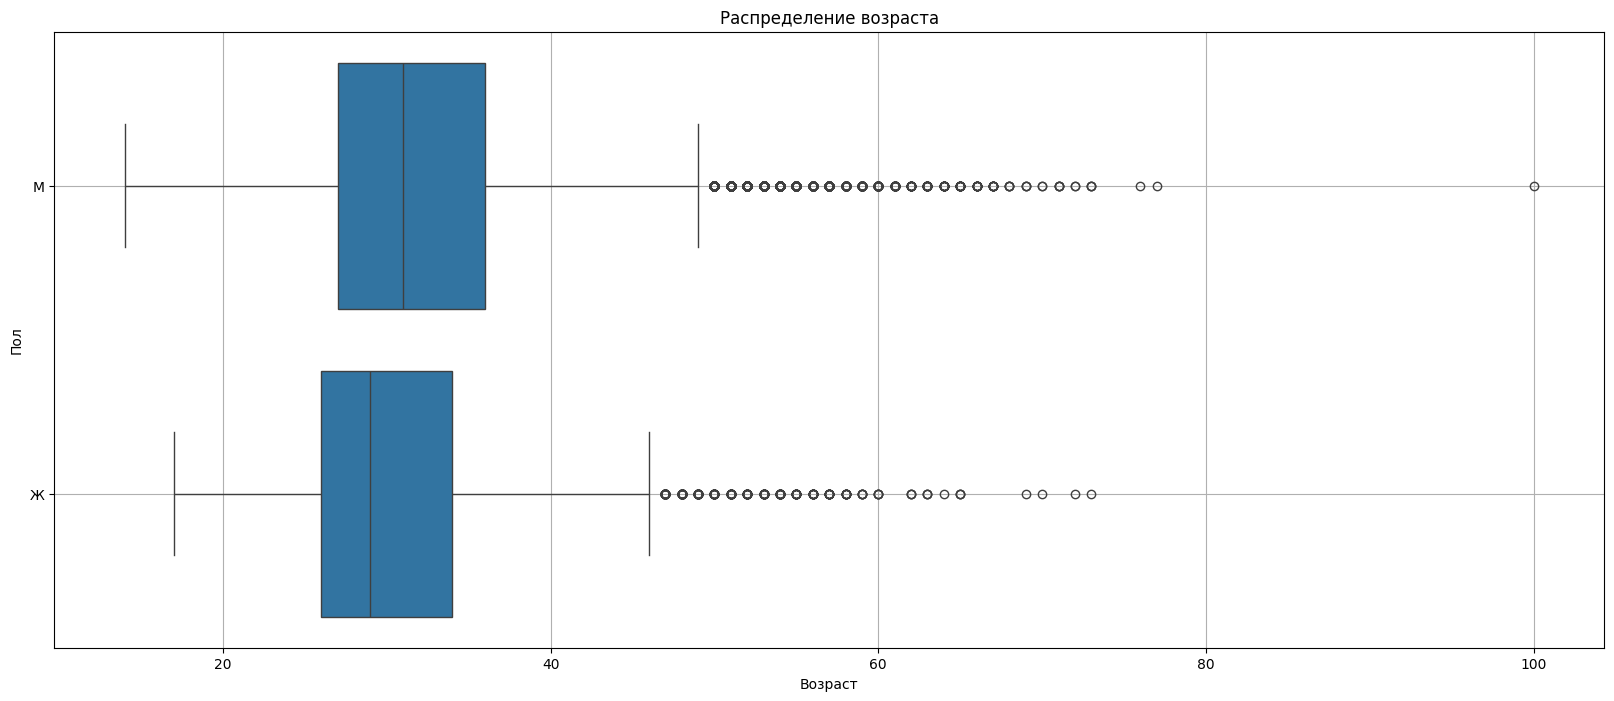

In [17]:
# Коробка
fig = plt.figure(figsize=(20, 8))
boxplot = sns.boxplot(
    data=hh_df,
    y='Пол',
    x='Возраст',
)
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Пол')
boxplot.set_title('Распределение возраста')
boxplot.grid()
plt.show()

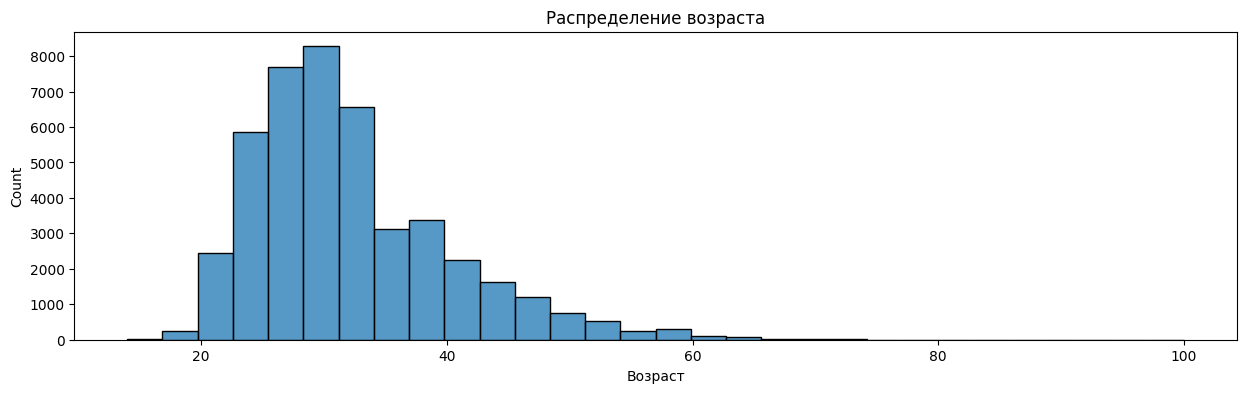

In [18]:
# Гистограмма
fig, axes = plt.subplots(figsize=(15, 4))
histplot = sns.histplot(hh_df['Возраст'], bins=30)
histplot.set_title('Распределение возраста')
plt.show()

*Вывод:* 
Мода распределения равна 30, т.к. возраст соискателей мужского пола составляет 31 год, а женского пола - 29 лет. 
Предельное значение возраста у мужчин - 100 лет, что может являться потенциальным выбросом в этой категории. У женщин наблюдаются небольшие выбросы с 60 до 73 лет.



2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

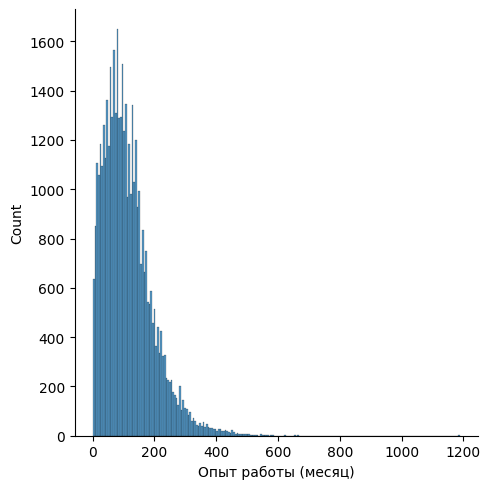

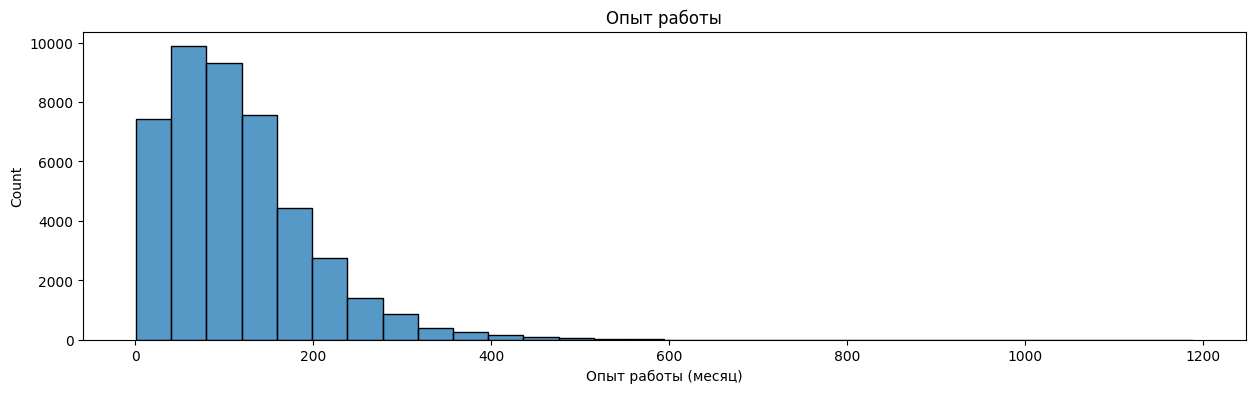

1188.0


In [19]:
# # График № 1
sns_plot = sns.displot(hh_df['Опыт работы (месяц)'])
# plt.show()

# # График № 2
fig, axes = plt.subplots(figsize=(15, 4))
histplot = sns.histplot(hh_df['Опыт работы (месяц)'], bins=30)
histplot.set_title('Опыт работы')
plt.show()

# # Просто убеждаемся, что ответ 1188 месяцев, который на графике еле виден – верен:
print(hh_df['Опыт работы (месяц)'].max())

In [20]:
# #Проверяем, действительно ли существует человек со стажем 1188 месяцев
print(hh_df.loc[hh_df['Опыт работы (месяц)'] == 1188])
print(hh_df.iloc[40015])
# # Не существует, т.к. этому человеку 48 лет (на 2019 год).

             Ищет работу на должность:  \
40015  Системный администратор Windows   

                                             Опыт работы  \
40015  Опыт работы 99 лет  Июнь 1920 — по настоящее в...   

      Последнее/нынешнее место работы  \
40015                  АО ТК Горизонт   

                     Последняя/нынешняя должность Обновление резюме  \
40015  Начальник отдела информационных технологий        2019-04-16   

             Авто Образование Пол  Возраст  Опыт работы (месяц)  ...  \
40015  Не указано      высшее   М       48               1188.0  ...   

      частичная занятость  удалённая работа  проектная работа  \
40015                True             False             False   

       удаленная работа  волонтёрство  вахтовый метод  волонтерство  \
40015              True         False            True         False   

       гибкий график  стажировка  ЗП (руб)  
40015           True       False   60000.0  

[1 rows x 25 columns]
Ищет работу на должность:           

*Вывод*: по данным графикам можно сделать вывод, что основной диапазон опыта работы равняется от 0 до 200 месяцев (0 и 16.5 лет соотвественно). Максимальное значение опыта работы равняется 1188 месяцев (99 лет), минимальное - 0.
Мода распределения показывает – 81 месяц. Медианное значение - 100 месяцев.
Аномалия признака опыта работы является максимальное значение, что соответствует 99 годам работы, что не является таковым после проверки.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [21]:
fig = px.histogram(
    data_frame=hh_df,
    x='ЗП (руб)',
    title='Распределение желаемой з/п соискателей',
    histnorm='percent',
    width=10000,
    marginal='box'
)
fig.show()

*Вывод:*
Предельные значения признака равняются (от большего к малому): 24.3М, 7.7М, 3М, 2.5М, 1.75М. 
Заработная плата большинства соискателей находится в интервале от 37К до 181К рублей. Средняя искомая зарплата – 59К рублей.
Аномалии признака возраста указаны в выводе к заданию 2.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [22]:
education_data = hh_df.groupby(
    by='Образование',
    as_index=False
)[['ЗП (руб)']].median()
# строим график
fig = px.bar(
    data_frame=education_data,
    x="Образование",
    y="ЗП (руб)",
    color='Образование', # расцветка в зависимости от уровня
    text = 'ЗП (руб)',
    orientation='v', # ориентация
    height=500,
    width=1000,
    title='Распределение уровня образования и её оплачиваемости'
)
fig.show()

*Вывод:* 
Наибольший уровень заработной платы предлагается для людей имеющих оконченное высшее образование. Для людей, которые имеют среднее и среднее специальное образование - зарплата ниже.
Признак уровня образования при прогнозировании заработной платы важно учитывать, т.к. разница в зарплате до и после получения высшего образования может отражать не только эффект последнего, но и воздействие иных социально-экономических факторов: предубеждения работодателей в отношении индивидов студенческого возраста, отсутствие у индивида достаточного
коммуникативного опыта и т.д. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [23]:
city_data = hh_df.groupby(
    by='Город',
    as_index=False
)[['ЗП (руб)']].max()
# строим график
fig = px.bar(
    data_frame=city_data,
    x="Город",
    y="ЗП (руб)",
    color='Город', # з/п в зависимости от города
    text = 'ЗП (руб)',
    orientation='v', 
    height=500,
    width=1000,
    title='Распределение уровня зарплаты в зависимости от города'
)
fig.show()

*Вывод:* 
Судя по данному графику – чем дальше работники находятся городов-миллионников, тем выше требуется уровень зарплаты. Возможно ввиду высоких цен в таких городах как Иркутск, Владивосток, Хабаровск и т.д.
Признак города важно учитывать, т.к. как описывалось выше – в стране возможна большая инфляция, которая касается отдалённых городов.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [24]:
bar_data = hh_df.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()

*Вывод:* 
На данном графие мы можем видеть наиболее длинную красную полосу, которая показывает медианную зарплату (67К рублей) работников, которые готовы и к переезду и к командировкам.
Нижняя синяя полоса показывает тех, кто не готов ни к переезду ни к командировкам и их медианная зарплата составляет 40К рублей

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

ЗП (руб)             1.000000e+00  1.800000e+01  2.500000e+01  2.698880e+01  \
Образование                                                                   
высшее                  35.000000           NaN           NaN          30.0   
неоконченное высшее     29.333333          23.0           NaN           NaN   
среднее                       NaN           NaN           NaN           NaN   
среднее специальное     22.000000           NaN          50.0           NaN   

ЗП (руб)             3.000000e+01  4.000000e+01  4.500000e+01  5.000000e+01  \
Образование                                                                   
высшее                        NaN          45.0          38.5          29.0   
неоконченное высшее           NaN           NaN           NaN          44.0   
среднее                       NaN           NaN           NaN           NaN   
среднее специальное          38.0           NaN           NaN          29.0   

ЗП (руб)             5.500000e+01  5.955285e+01  .

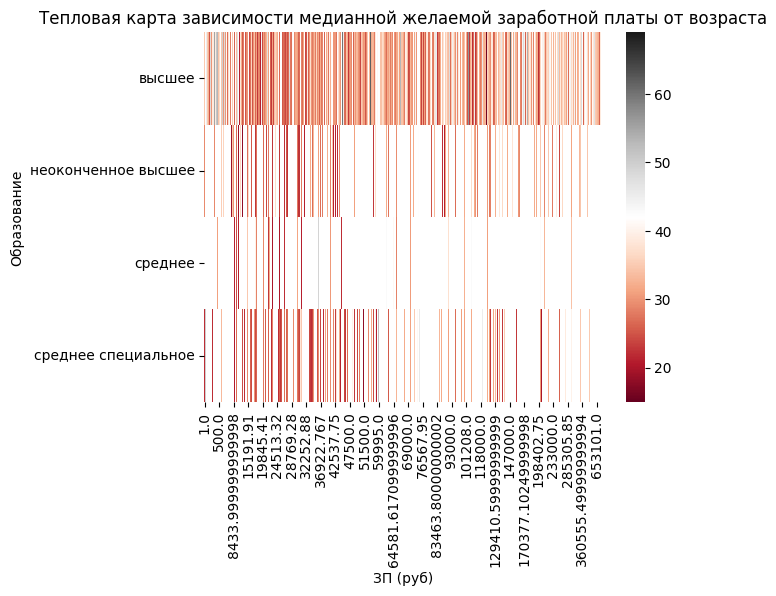

In [25]:
pivot_salary_age = hh_df.pivot_table(
    values = 'Возраст',
    index =  'Образование',
    columns = 'ЗП (руб)'
)
print(pivot_salary_age)

heatmap = sns.heatmap(data=pivot_salary_age, cmap='RdGy')
heatmap.set_title('Тепловая карта зависимости медианной желаемой заработной платы от возраста')
plt.show()

*Вывод:* 
Данная тепловая карта показывает 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [26]:
fig = px.line(
    pd.DataFrame({'Возраст соискателя (лет)': [0, 200], 'Опыт работы (лет)': [0, 200]}), 
    x='Возраст соискателя (лет)', y='Опыт работы (лет)'
)
fig.add_scatter(
    x=hh_df['Возраст'], 
    y=hh_df['Опыт работы (месяц)'] / 12, 
    mode='markers'
)
fig.show() # # Ответ: 7

*Вывод:* 
На данном графике мы можем увидеть 7 точек, которые находятся за прямой линией и(или) лежат на ней.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


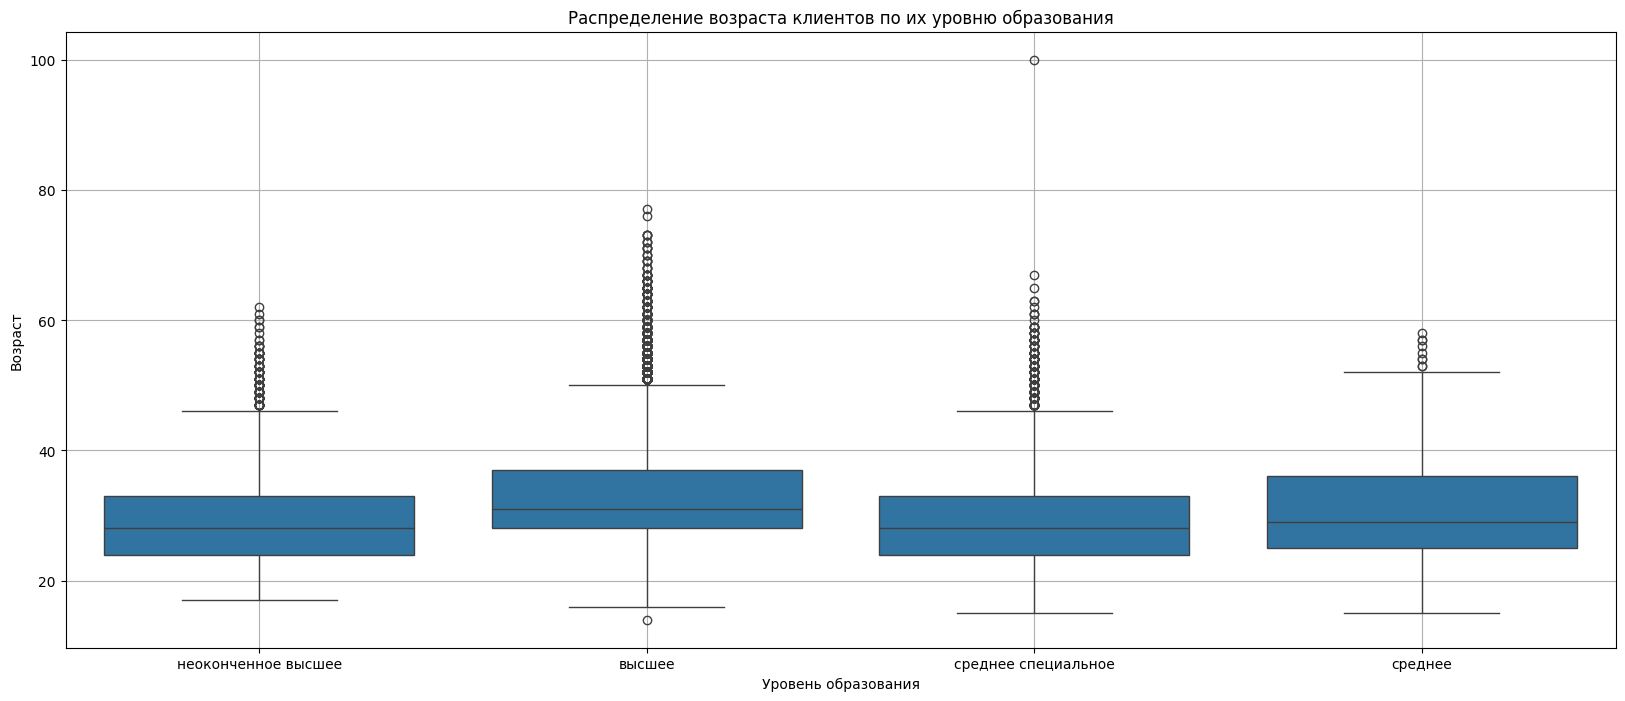

In [27]:
# # График №1
fig = plt.figure(figsize=(20, 8))
boxplot = sns.boxplot(
    data=hh_df,
    y='Возраст',
    x='Образование',
)
boxplot.set_xlabel('Уровень образования')
boxplot.set_ylabel('Возраст')
boxplot.set_title('Распределение возраста клиентов по их уровню образования')
boxplot.grid()
plt.show()

*Вывод:* 
На данном графике мы можем видеть распределение между уровнем образования и возрастом. *Неоконченное* высшее образование наблюдается у некоторых людей в диапазоне от 23 до 34 лет.
Высшее образование имеется у людей в диапазоне от 27 до 37 лет.
Среднее специальное находится практически в том же диапазоне, что и неконченное высше – от 23 до 33 лет. 
Среднее образование имеется у людей от 24 до 36 лет.
В каждом признаке мы видим потенциальные выбросы. В высшем образовании бросается в глаза выбросы с возрастом в 75-77 лет, что может не являться действительностью без проверки. Тем не менее, люди могут получать (второе) высшее в таком возрасте.

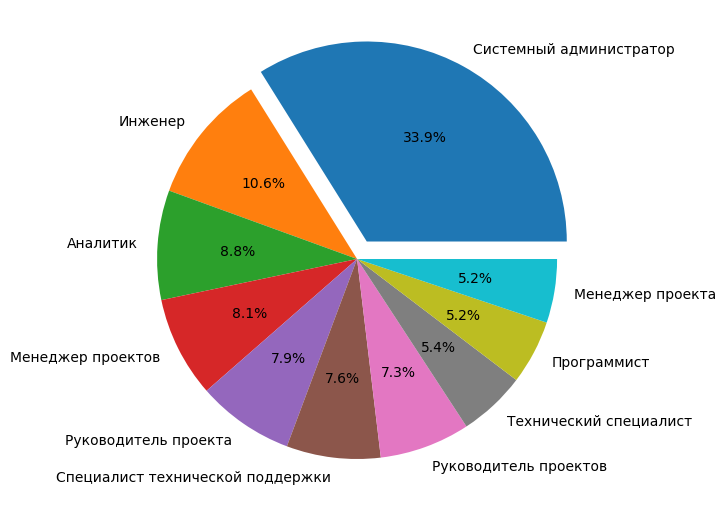

In [28]:
# # График №2
desired_job = hh_df['Ищет работу на должность:'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    desired_job,
    labels=desired_job.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
)
plt.show()

*Вывод:* 
На данной круговой диаграмме мы наблюдаем популярные должности, которые ищут люди. 33.9% из них ищут должность на вакансию Системного администратора и только 5.2% на должность Менеджера проета

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [29]:
dupl_columns = list(hh_df.columns)
mask = hh_df.duplicated(subset=dupl_columns)
hh_duplicates = hh_df[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}') # # Ответ: 161
hh_df = hh_df.drop_duplicates()

null_df = hh_df.isnull().sum() 
print(null_df[null_df > 0]) # # Ответ: 168 пропусков

Число найденных дубликатов: 155
Опыт работы                        166
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [30]:
cols_null_percent = hh_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
print(cols_with_null) # # Ответ: 3 столбца с пропусками

Опыт работы (месяц)                0.376775
Опыт работы                        0.372289
Последняя/нынешняя должность       0.004485
Последнее/нынешнее место работы    0.002243
dtype: float64


3. Итак, у нас есть пропуски в 3х столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [37]:
hh_df['Опыт работы (месяц)'].fillna(hh_df['Опыт работы (месяц)'].median(), inplace=True)
print(hh_df['Опыт работы (месяц)'].mean()) # # Ответ: 114.399968483375

114.399968483375


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [41]:
wrong_salary = hh_df[(hh_df['ЗП (руб)'] > 1000000) | (hh_df['ЗП (руб)'] < 1000)]
print(f'Результирующее число выбросов: {wrong_salary.shape[0]}')  # # Ответ: 89 выбросов
cleaned_salary = hh_df.drop(wrong_salary.index, axis=0) # удаляем выбросы из набора данных
# print(f'Результирующее число записей: {cleaned_salary.shape[0]}')  # # Ответ: 44494

Результирующее число выбросов: 89


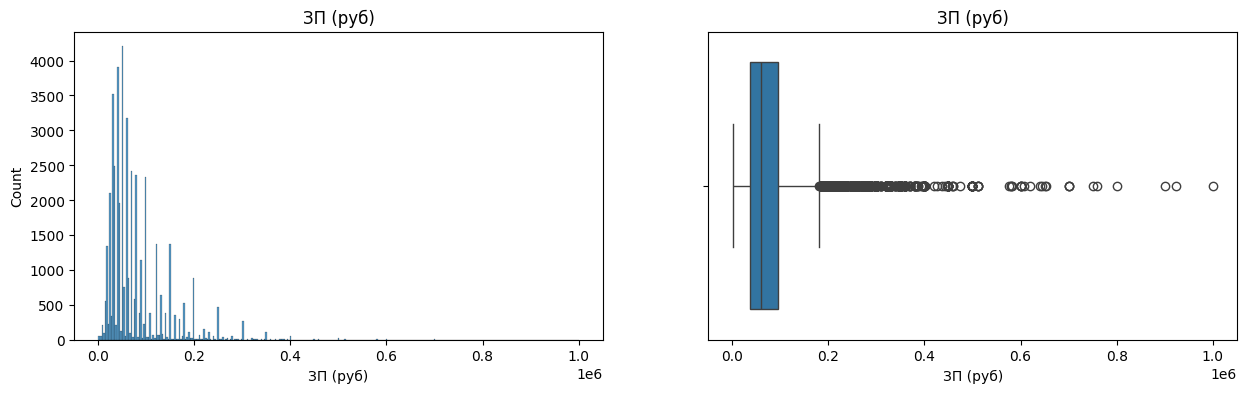

In [33]:
# Визуализировано:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned_salary, x='ЗП (руб)', ax=axes[0])
histplot.set_title('ЗП (руб)')
boxplot = sns.boxplot(data=cleaned_salary, x='ЗП (руб)', ax=axes[1])
boxplot.set_title('ЗП (руб)')
plt.show()

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [40]:
wrong_exp = hh_df[hh_df['Возраст'] <= (hh_df['Опыт работы (месяц)']/12)]
print(wrong_exp.shape[0]) # # Ответ: 7
cleaned_exp = hh_df.drop(wrong_exp.index, axis=0)
# print(f'Результирующее число записей: {cleaned_exp.shape[0]}')  # # Ответ: 44576

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

In [39]:
def outliers_z_score(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(hh_df, 'Возраст', left=3, right=4,  log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}') # # Ответ: 3

Число выбросов по методу z-отклонения: 4


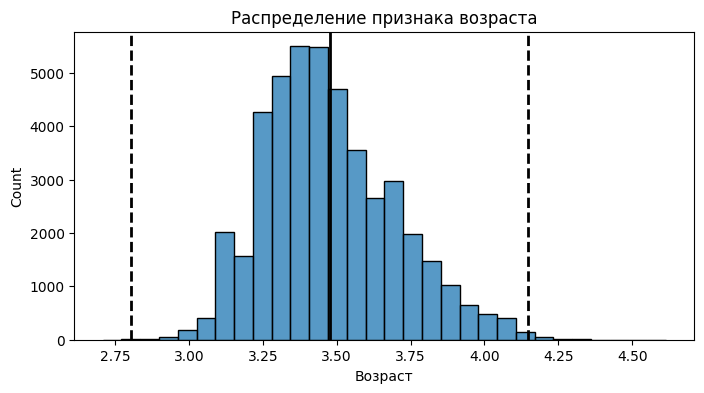

In [36]:
# Визуализированно
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_df['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение признака возраста')
plt.show()

*В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.
Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?*

Вывод: